In [447]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [448]:
sns.set_style('ticks')

In [449]:
data = pd.read_csv("./data/train_home_price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [450]:
len(data.columns)

81

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [452]:
null_ranked = pd.DataFrame(data.isnull().sum(), columns  = ['sum of null value']).sort_values(by = "sum of null value", ascending=False).iloc[:38]
# terlihat bahwa PoolQC merupakan atribut dengan jumlah nilai nukll terbanyak dan hanya 6 baris dari  kolom PoolQC yang terisi
null_ranked

,sum of null value
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [453]:
object_type = [(column, value) for column, value in zip(null_ranked.index, null_ranked['sum of null value']) if data[column].dtype == "object"]
object_type

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('GarageCond', 81),
 ('GarageType', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('BsmtFinType2', 38),
 ('BsmtExposure', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('Electrical', 1),
 ('Functional', 0),
 ('KitchenQual', 0),
 ('PavedDrive', 0)]

C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_20384\548466995.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(data.corr()), annot=True)


<Axes: >

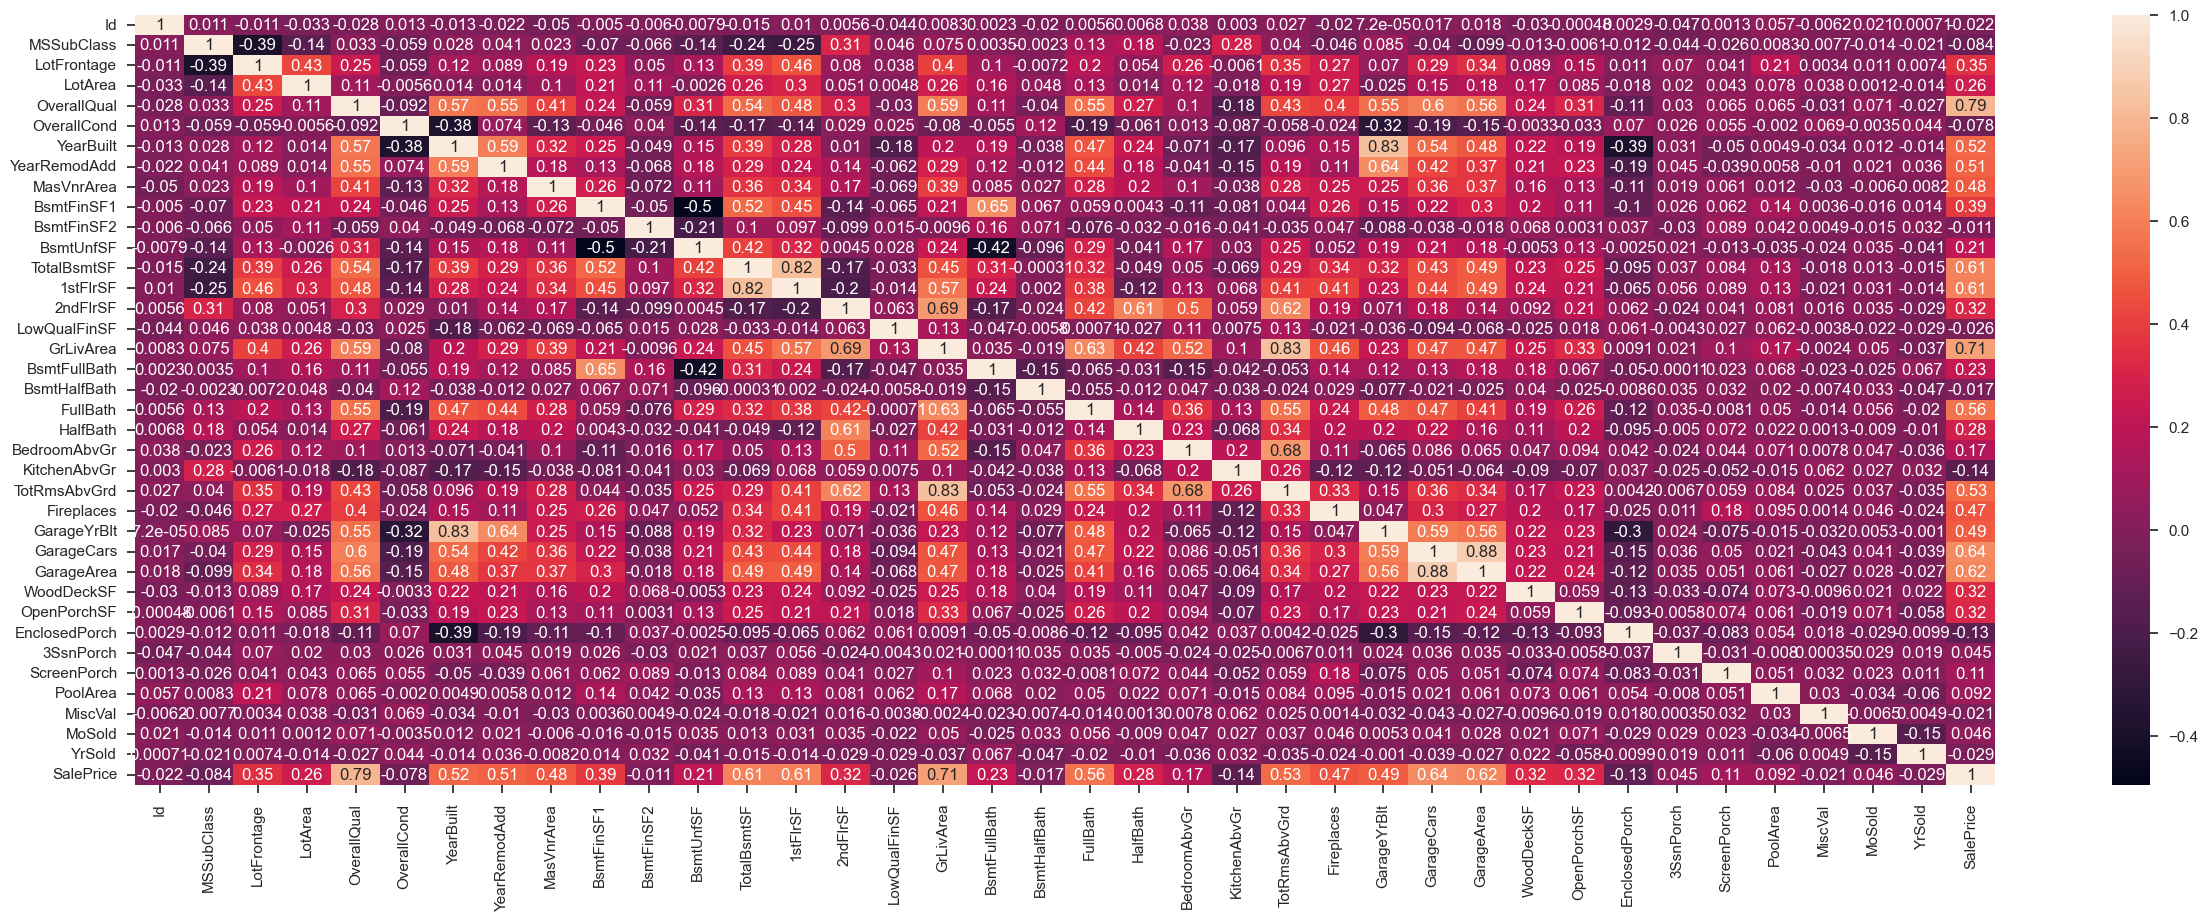

In [454]:

fig, ax = plt.subplots(figsize = (30, 10))
sns.heatmap(pd.DataFrame(data.corr()), annot=True)

C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_20384\3334937955.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Year Build Distribution')

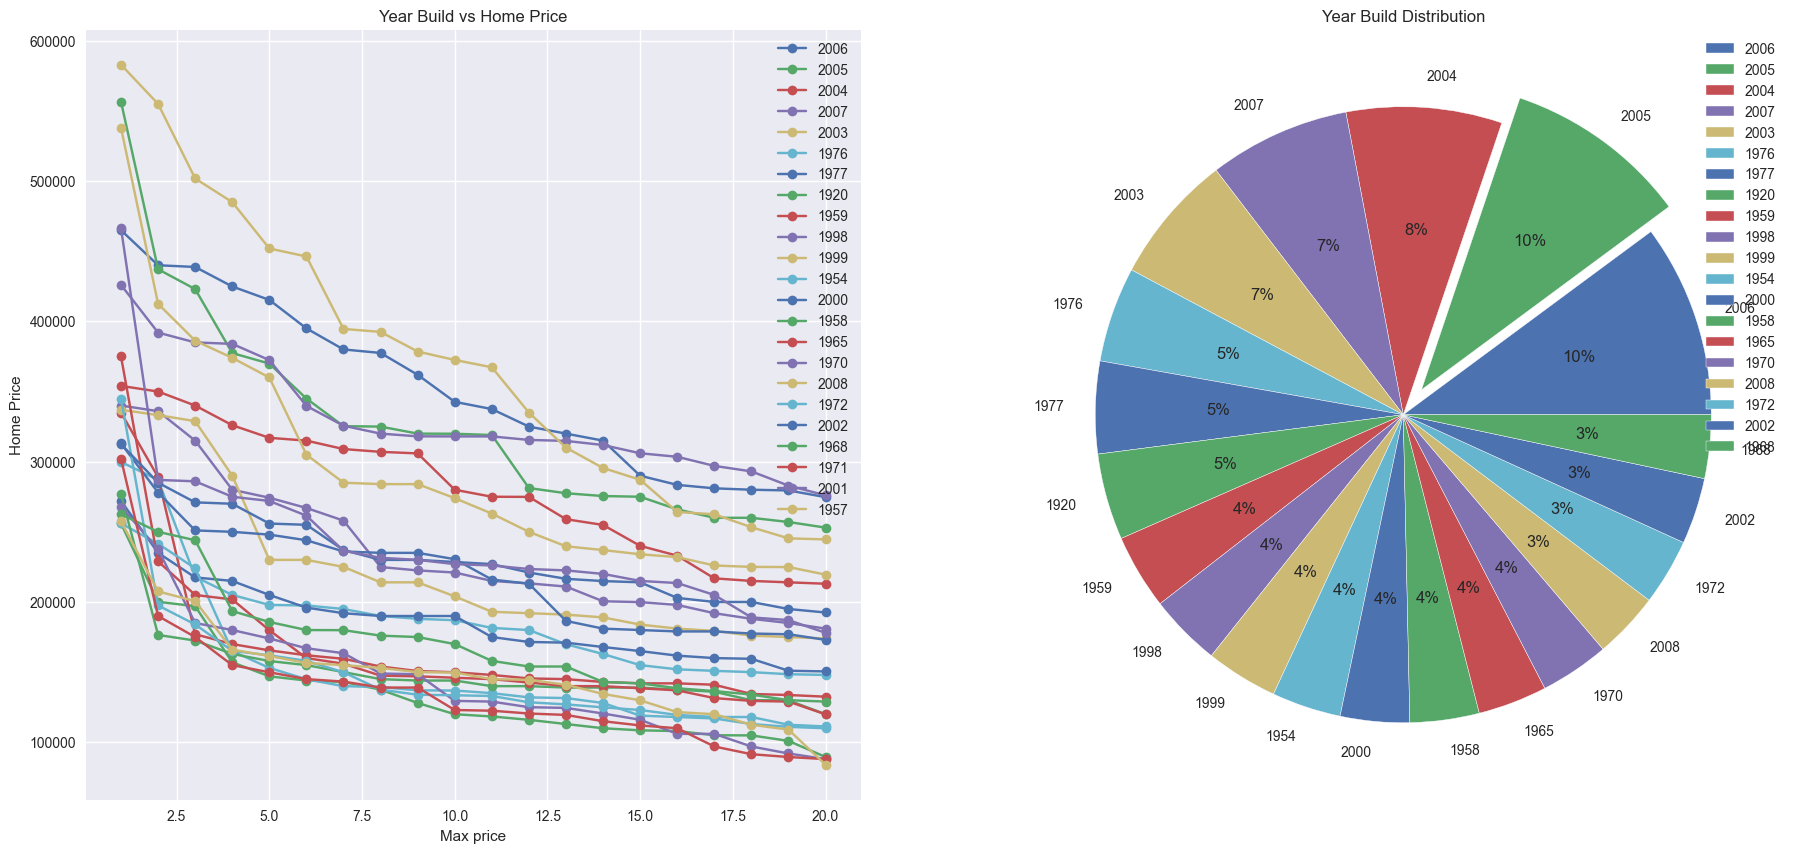

In [455]:
# fig, ax = plt.subplots(figsize = (15,10),ncols=1, nrows=2)
plt.style.use("seaborn")
def get_max_sequences_price(data : pd.DataFrame):
    years = data.groupby("YearBuilt").size().sort_values(ascending=False).reset_index(name = "count")['YearBuilt'][:23].to_list()
    prices = []
    for year in years: 
        temp = []
        for row in range(data.shape[0]): 
            if data.loc[row, "YearBuilt"] == year: 
                temp.append(data.loc[row, "SalePrice"])
        # sorting 
        prices.append(np.sort(temp)[::-1].tolist())    
    return years, prices


years, prices = get_max_sequences_price(data)
fig, ax = plt.subplots(figsize = (22, 10), nrows=1, ncols=2)

for year, prices in zip(years, prices):
    temp = prices[:20]
    ax[0].plot([x for x in  range(1, 21)], temp, marker='o', label = year)
   

ax[0].set_xlabel("Max price")
ax[0].set_ylabel("Home Price")
ax[0].legend()
ax[0].set_title("Year Build vs Home Price")

explode = [0, 0.1] + [0] * 18
ax[1].pie(data.groupby("YearBuilt").size().sort_values(ascending=False).reset_index(name = "count")['count'][:20], labels=data.groupby("YearBuilt").size().sort_values(ascending=False).reset_index(name = "count")['YearBuilt'][:20],  autopct='%.0f%%', explode = explode) 
ax[1].legend()
ax[1].set_title("Year Build Distribution")





Text(0.5, 1.0, 'Total square feet of basement area vs Sale Price')

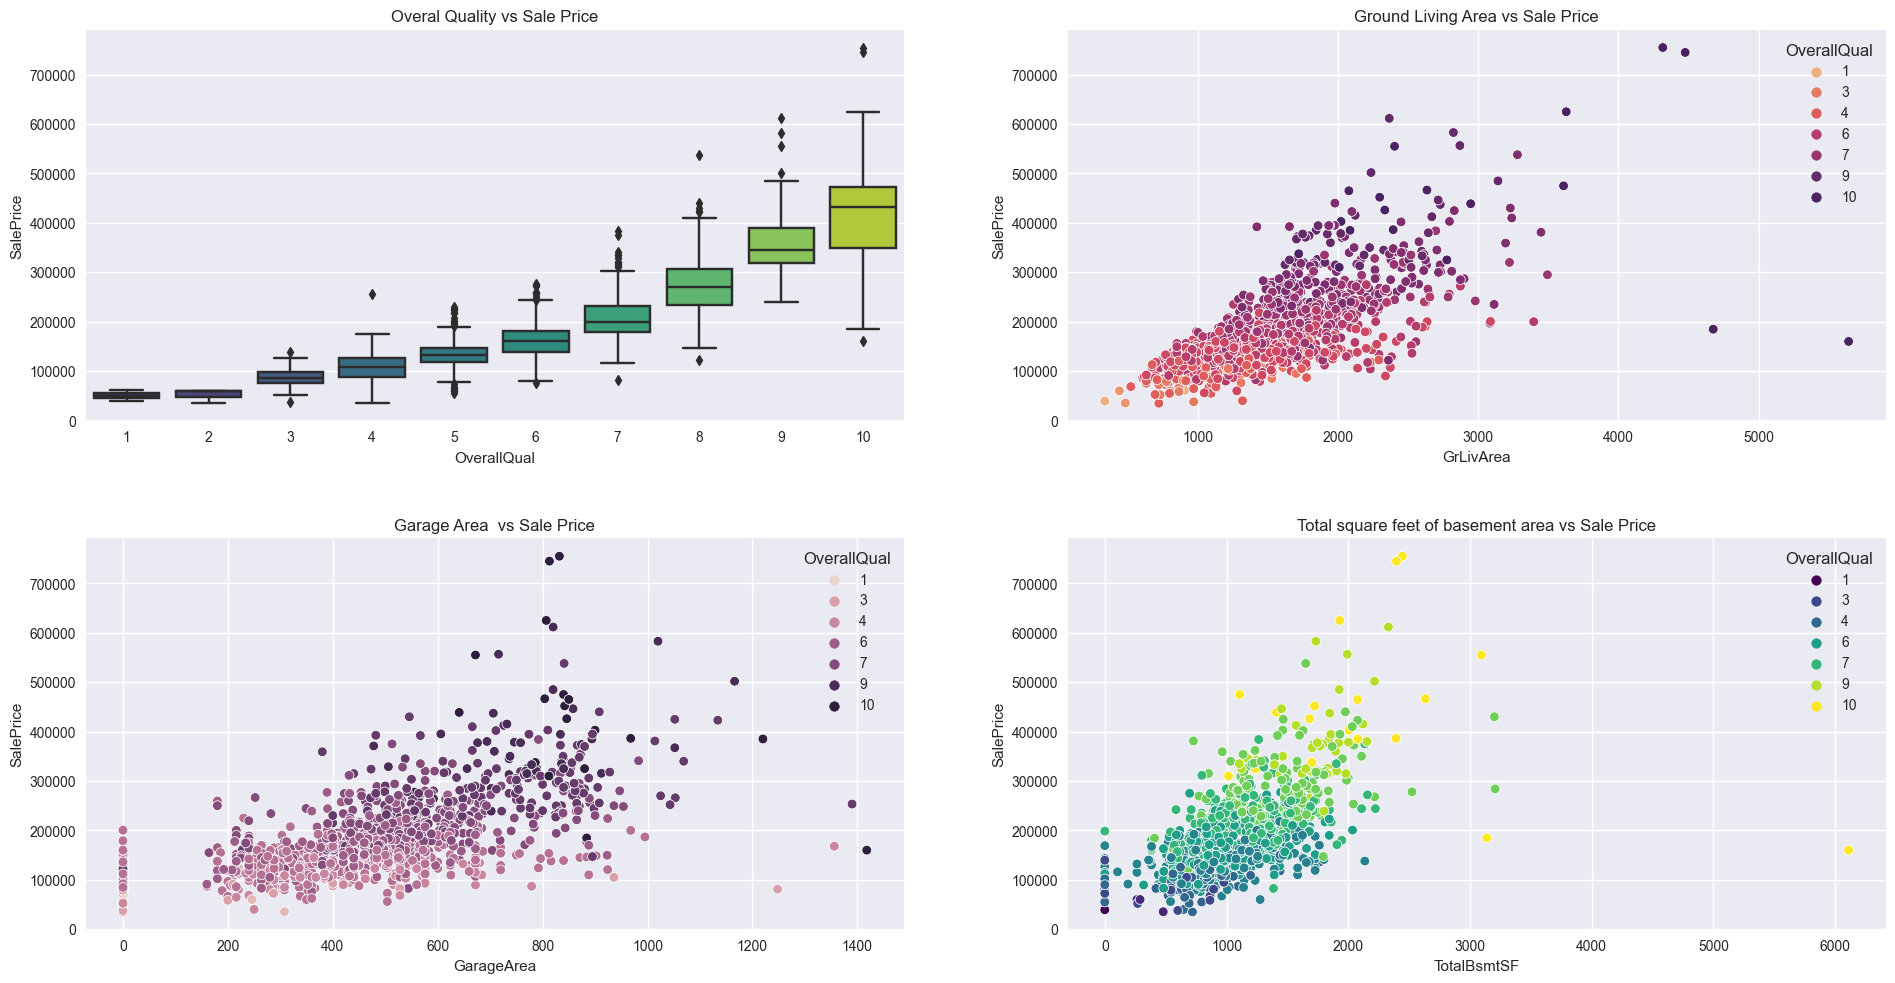

In [456]:
fig, ax = plt.subplots(figsize = (20, 10),ncols=2, nrows=2)
plt.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.3, wspace=0.2)
sns.boxplot(data=data, x ="OverallQual", y = 'SalePrice', palette='viridis', ax = ax[0,0])
ax[0, 0].set_title("Overal Quality vs Sale Price")

sns.scatterplot(data=data, x ="GrLivArea", y = 'SalePrice', palette='flare', ax = ax[0, 1], hue ="OverallQual" )
ax[0, 1].set_title("Ground Living Area vs Sale Price")

sns.scatterplot(data=data, x ="GarageArea", y = 'SalePrice', ax = ax[1,0], hue = "OverallQual")
ax[1, 0].set_title("Garage Area  vs Sale Price")

sns.scatterplot(data=data, x ="TotalBsmtSF", y = 'SalePrice', palette='viridis', ax = ax[1, 1], hue ="OverallQual" )
ax[1, 1].set_title("Total square feet of basement area vs Sale Price")



'\nkesimpulan : \n- terlihat bahwa Rumah yang dalam keadaan normal saat sales condition memiliki variasi jumloah garasi yang bervariasi dibadingkan dengan yang lain namun didominasi dengan jumlah garasi yang saama dengan 2\n- rumah dengan tipe sales condition adjland tidak memiliki garasi sama sekali \n- rumah yang sales condition nya normal mnemiliki kualiatas garasi dengan kualitas rata rata terbanyak dibandingkan dengan jenis sales condition yang lain namun masih ditemukann juga dengan kondisi garasi yang tidak baik dari sisi kualitasnya (poor) \n- rumah dengan normal sales conditon juga menawarkan variasi luas garasi yang lebih beragam dibandingkan dengan yang lain, dan juga menmawarkan garasi dengan luaas terluas terbanyak dibanmdingkan dengan yang lain\n- sehingga sebagai kesimpulan untuk garaga features, jika pembeli ingin mempeerhatikan kondisi garage maka disarankan untuk memilih rumah dengan tipe normal atau partial (yang sedang dibangun / belum selesai dibangun )\n'

<Figure size 800x550 with 0 Axes>

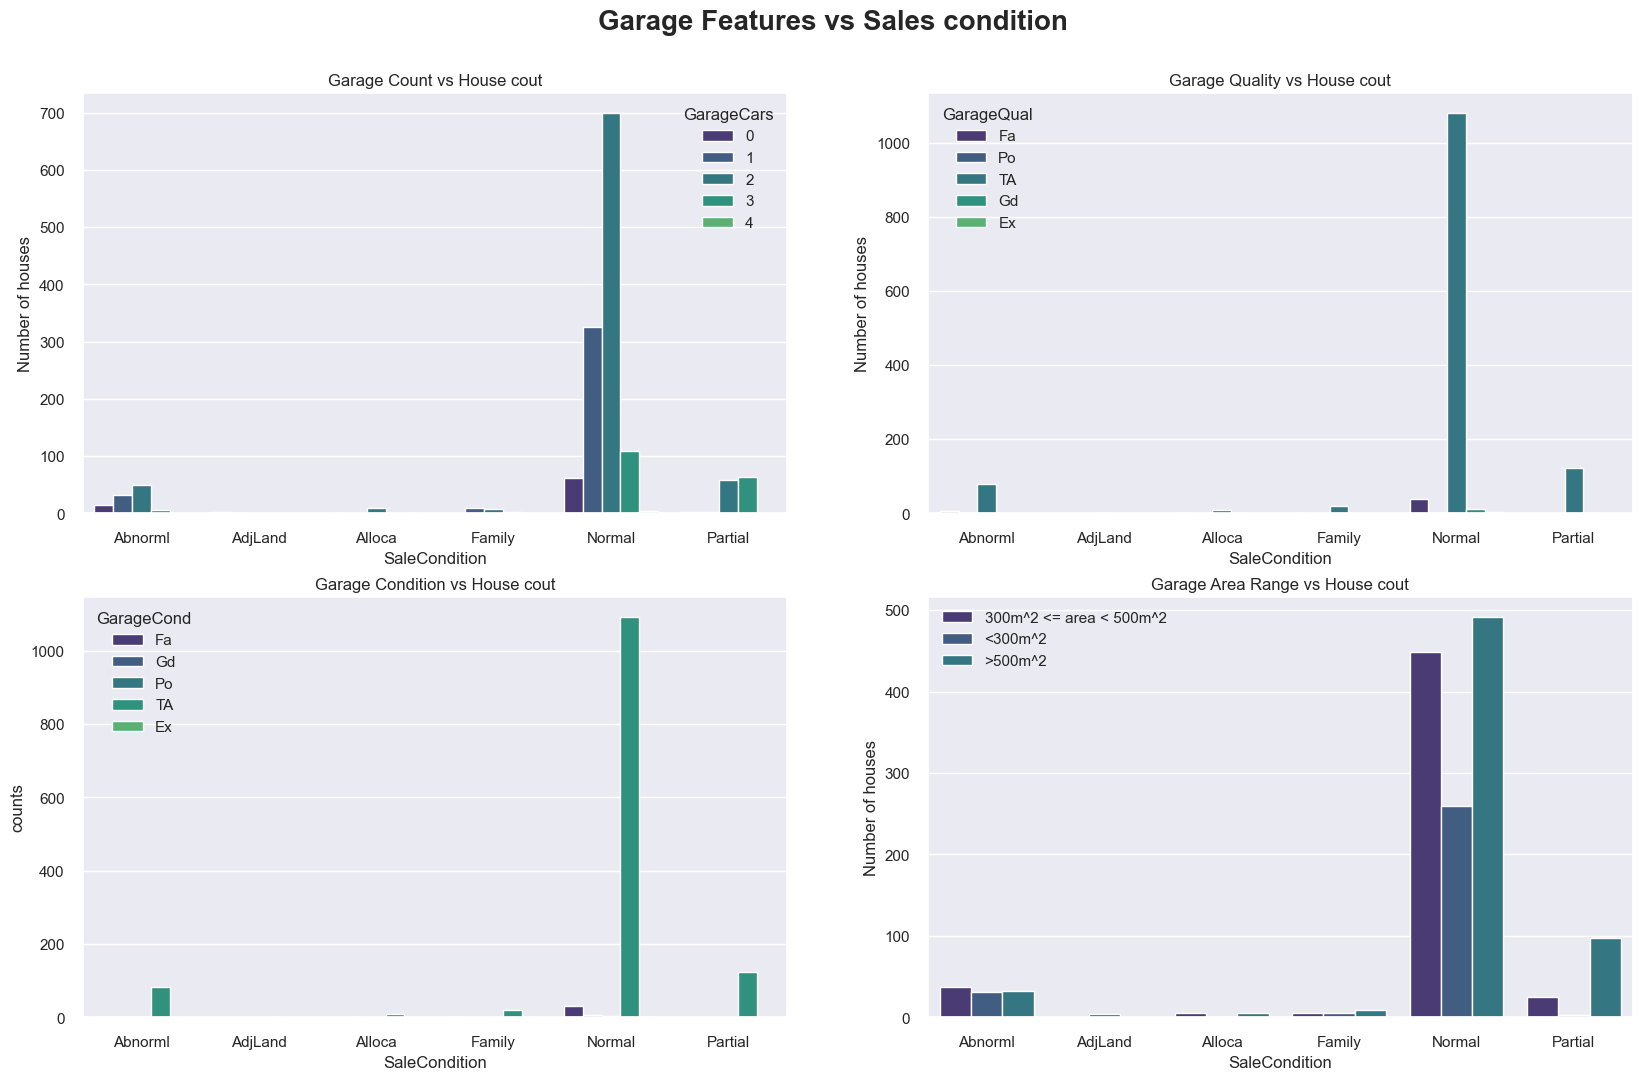

In [457]:
sns.set_theme()
sns.axes_style("darkgrid")
sns.despine()
def new_garage_area(data : pd.DataFrame) -> pd.DataFrame: 
    data["garage_range"] = "0" * data.shape[0]
    for row in range(data.shape[0]):
        if data.loc[row, "GarageArea"] < 300:
            data.at[row, "garage_range"] = "<300m^2"
        elif data.loc[row, "GarageArea"] >= 300 and  data.loc[row, "GarageArea"] < 500:
            data.at[row, "garage_range"] = "300m^2 <= area < 500m^2"
        else:
            data.at[row, "garage_range"] = ">500m^2" 
    return data


new_data = new_garage_area(data)
palette = sns.color_palette("viridis")
# korelasi antara GarageCars', 'GarageArea', 'GarageQual', 'GarageCond terhadap kondisi rumah yang dijuaal
fig, ax = plt.subplots(figsize = (20, 12), ncols=2, nrows=2)
fig.suptitle('Garage Features vs Sales condition', fontsize=20, y=0.95, fontweight ="bold")

# Membuat barplot menggunakan data yang sudah diagregasi
plt.title("Garage vs Sales Condition")
sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCars']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageCars', ax=ax[0, 0], palette=palette)
ax[0, 0].set_ylabel("Number of houses")
ax[0, 0].set_title("Garage Count vs House cout")

sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageQual']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageQual', ax=ax[0, 1], palette= palette)
ax[0, 1].set_ylabel("Number of houses")
ax[0, 1].set_title("Garage Quality vs House cout")

sns.barplot(data=new_data.groupby(['SaleCondition', 'garage_range']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='garage_range', ax=ax[1, 1], palette=palette)
ax[1, 0].set_ylabel("Number of houses")
ax[1, 0].set_title("Garage Condition vs House cout")

sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCond']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageCond', ax=ax[1, 0], palette=palette)
ax[1, 1].set_ylabel("Number of houses")
ax[1, 1].set_title("Garage Area Range vs House cout")

ax[1, 1].legend(loc='upper left')



"""
note 
Abnormal: Merujuk pada kondisi atau situasi yang tidak biasa atau tidak lazim terkait dengan properti.
Adjland : proses pembelian sebidang tanah yang berbatasan langsung dengan properti yang sudah dimiliki oleh pembeli
Alloc: alokasi - dua properti terkait dengan akta terpisah" merujuk pada situasi di mana dua unit properti yang berbeda (biasanya unit kondominium dan unit garasi) dimiliki secara terpisah namun terkait.
Family  : Sale between family members
Normal : Normal Sale
Partial : Home was not completed when last assessed (associated with New Homes)

"""

"""
GarageQual: Garage quality
  Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fairs
       Po	Poor
       NA	No Garage


GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

"""

"""
kesimpulan : 
- terlihat bahwa Rumah yang dalam keadaan normal saat sales condition memiliki variasi jumloah garasi yang bervariasi dibadingkan dengan yang lain namun didominasi dengan jumlah garasi yang saama dengan 2
- rumah dengan tipe sales condition adjland tidak memiliki garasi sama sekali 
- rumah yang sales condition nya normal mnemiliki kualiatas garasi dengan kualitas rata rata terbanyak dibandingkan dengan jenis sales condition yang lain namun masih ditemukann juga dengan kondisi garasi yang tidak baik dari sisi kualitasnya (poor) 
- rumah dengan normal sales conditon juga menawarkan variasi luas garasi yang lebih beragam dibandingkan dengan yang lain, dan juga menmawarkan garasi dengan luaas terluas terbanyak dibanmdingkan dengan yang lain
- sehingga sebagai kesimpulan untuk garaga features, jika pembeli ingin mempeerhatikan kondisi garage maka disarankan untuk memilih rumah dengan tipe normal atau partial (yang sedang dibangun / belum selesai dibangun )
"""



C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_20384\1825497021.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCars']).mean().reset_index(), x='SaleCondition', y=new_data['SalePrice'], hue='GarageCars', ax=ax[0, 0], palette=sns.color_palette("viridis"))
C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_20384\1825497021.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageQual']).mean().reset_index(), x='SaleCondition', y=new_data['SalePrice'] , hue='GarageQual', ax=ax[0, 1], palette

'\n\n\n'

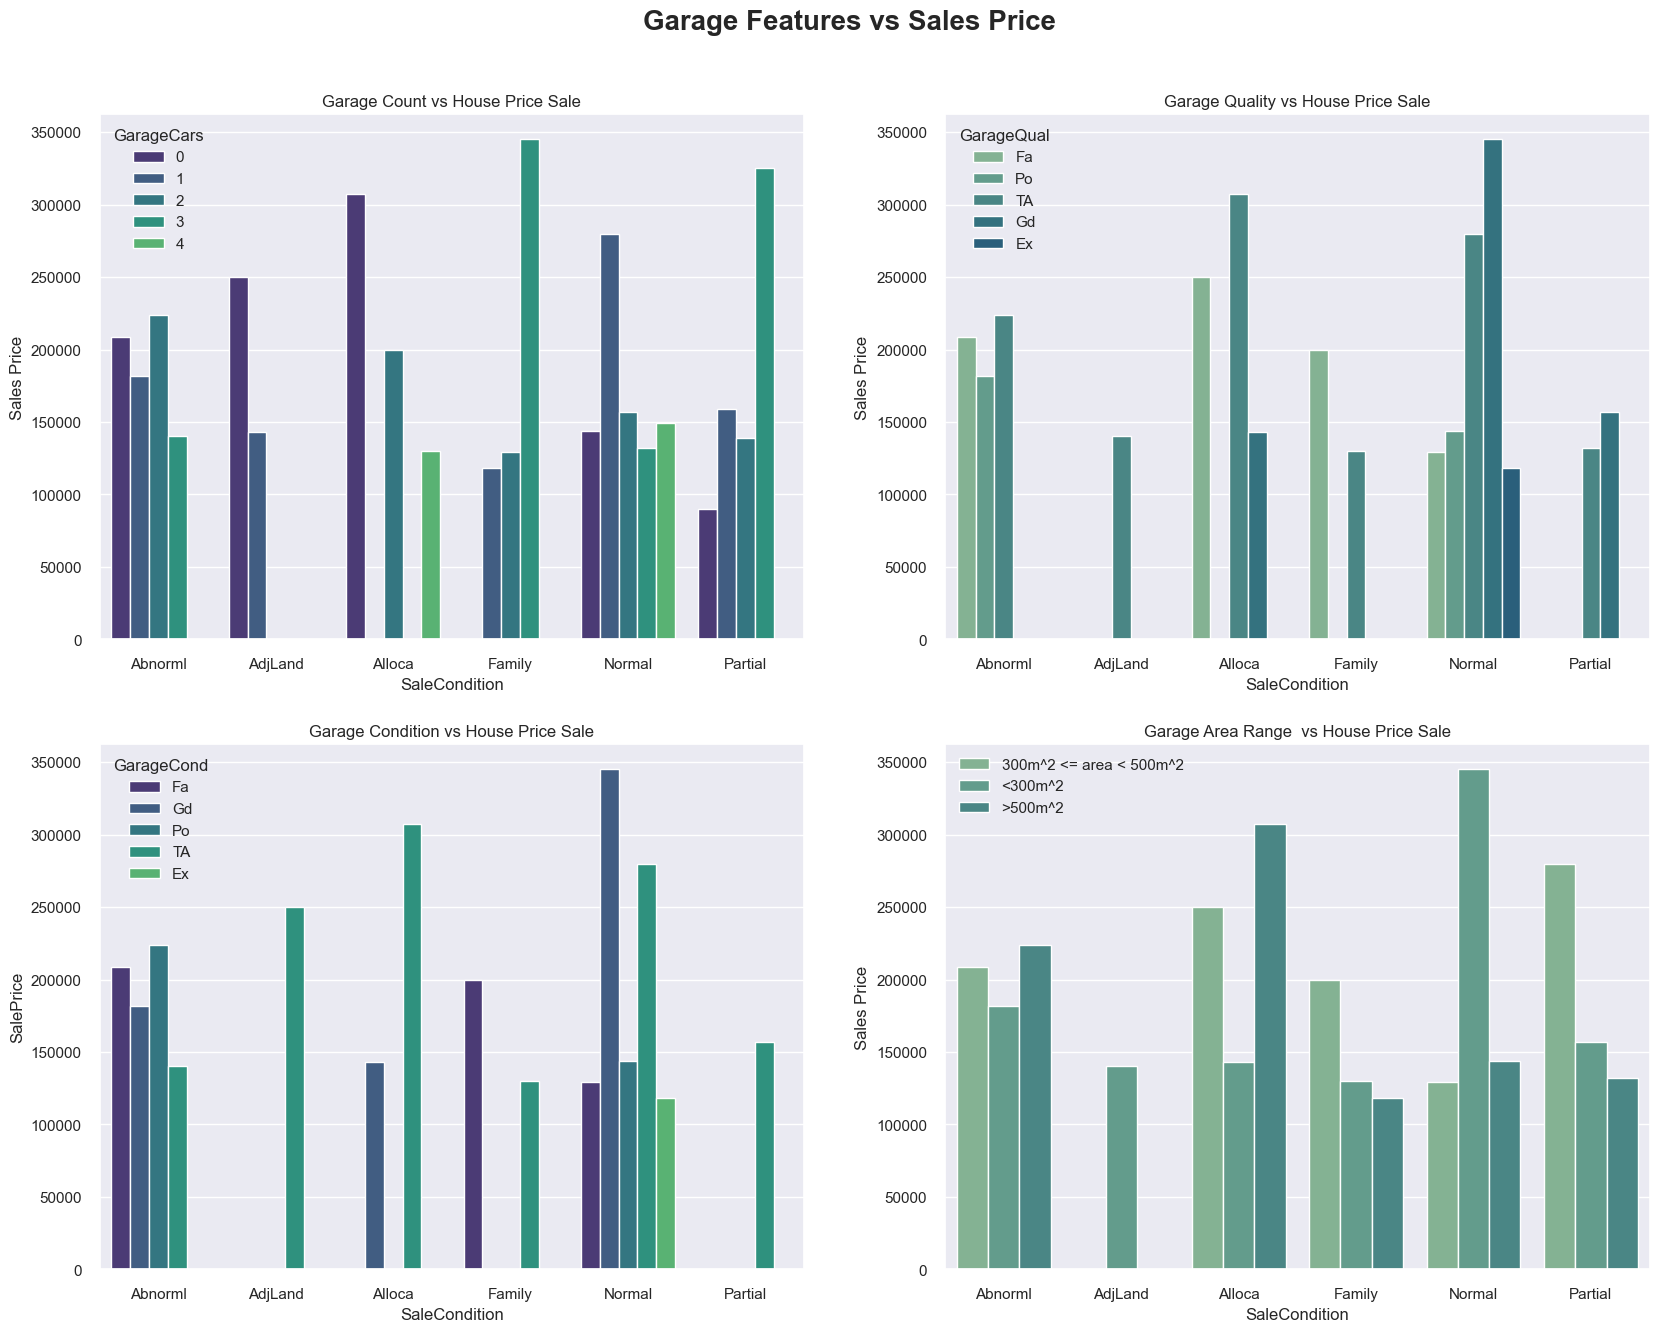

In [458]:
fig, ax = plt.subplots(figsize = (20, 15), ncols=2, nrows=2)
fig.suptitle('Garage Features vs Sales Price', fontsize=20, y=0.95, fontweight ="bold")

sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCars']).mean().reset_index(), x='SaleCondition', y=new_data['SalePrice'], hue='GarageCars', ax=ax[0, 0], palette=sns.color_palette("viridis"))
ax[0, 0].set_ylabel("Sales Price")
ax[0, 0].set_title("Garage Count vs House Price Sale")

sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageQual']).mean().reset_index(), x='SaleCondition', y=new_data['SalePrice'] , hue='GarageQual', ax=ax[0, 1], palette=sns.color_palette("crest"))
ax[0, 1].set_ylabel("Sales Price")
ax[0, 1].set_title("Garage Quality vs House Price Sale")


sns.barplot(data=new_data.groupby(['SaleCondition', 'garage_range']).mean().reset_index(), x='SaleCondition', y=new_data['SalePrice'], hue='garage_range', ax=ax[1, 1], palette= sns.color_palette("crest"))
ax[1, 0].set_ylabel("Sales Price")
ax[1, 0].set_title("Garage Condition vs House Price Sale")

sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCond']).mean().reset_index(), x='SaleCondition', y=new_data['SalePrice'], hue='GarageCond', ax=ax[1, 0], palette=sns.color_palette("viridis"))
ax[1, 1].set_ylabel("Sales Price")
ax[1,1].legend(loc='upper left')
ax[1, 1].set_title("Garage Area Range  vs House Price Sale")
'''


'''

In [471]:

def get_correlation(data) -> pd.DataFrame:
    get_correlation = pd.DataFrame(abs(data.corr()['SalePrice']).sort_values(ascending = False))
    return get_correlation


def drop_column_if_null(data: pd.DataFrame, correlation_score: pd.DataFrame, null_ranked: pd.DataFrame) -> pd.DataFrame:
    # Hapus kolom berdasarkan jumlah nilai yang null
    temp = []
    for null_column in null_ranked.index:
        if null_ranked.loc[null_column, "sum of null value"] > 0: 
            for corel_val in correlation_score.index: 
                if corel_val == null_column: 
                    if correlation_score.loc[corel_val, "SalePrice"] < 0.30: 
                        data.drop(null_column,  axis = 1, inplace =True)
                    else: 
                        temp.append(null_column)
        else: 
            break 
    return data, temp

def drop_columns(data: pd.DataFrame, correlation_score: pd.DataFrame): 
    for column in data.columns:
        for idx in correlation_score.index:
            if idx == column: 
                if correlation_score.loc[idx, 'SalePrice'] < 0.30: 
                    data.drop(column, axis = 1, inplace= True)
    return data 



def insert_null_row (data: pd.DataFrame, temp: list) -> pd.DataFrame: 
    for column in temp:
        if data[column].dtype == 'int64' or data[column].dtype == 'int32':
            insert_value = np.floor(np.mean([x for x in data[column] if x != np.nan], axis = 0))
        else: 
            insert_value = np.mean([x for x in data[column][~data[column].isna()]], axis = 0).round(2)
        for row in range(data.shape[0]): 
            if pd.isna(data.loc[row, column]):
                data.at[row, column] = insert_value
    return data

def convert_object_to_numeric(data : pd.DataFrame) -> pd.DataFrame: 
    dict_encode = {}
    for column in data.columns: 
        if data[column].dtype == "object": 
            le = LabelEncoder()
            le.fit(data[column])
            for uniq_val in data[column].unique(): 
                dict_encode[uniq_val] =  le.transform([uniq_val])[0]
            data[column] = le.fit_transform(data[column])

    return data, dict_encode



data_converted, dict_encode  = convert_object_to_numeric(data)
correel_value = get_correlation(data_converted)
new_data_converted, temp = drop_column_if_null(data = new_data, correlation_score=correel_value, null_ranked=null_ranked)
new_data_converted = insert_null_row(data =  new_data_converted, temp = temp)
new_data_converted = drop_columns(data = new_data_converted, correlation_score= correel_value)
new_data_converted.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,garage_range
0,65.0,7,2003,2003,196.0,2,2,2,3,706,...,5,1,2003.0,1,2,548,0,61,208500,2
1,80.0,6,1976,1976,0.0,3,1,2,1,978,...,4,1,1976.0,1,2,460,298,0,181500,0
2,68.0,7,2001,2002,162.0,2,2,2,2,486,...,4,1,2001.0,1,2,608,0,42,223500,2
3,60.0,7,1915,1970,0.0,3,0,3,3,216,...,2,5,1998.0,2,3,642,0,35,140000,2
4,84.0,8,2000,2000,350.0,2,2,2,0,655,...,4,1,2000.0,1,3,836,192,84,250000,2


In [472]:
new_data_converted.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinSF1      0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
garage_range    0
dtype: int64

In [465]:
# get_correlation = pd.DataFrame(abs(new_data.corr()['SalePrice']).sort_values(ascending = False))
# get_correlation

In [466]:
# new_data.groupby(['SaleCondition', 'GarageCars']).size().reset_index(name='counts')
# new_data

In [467]:
# # house price vs garage features
# new_data.info()

In [468]:

# def convert_to_label_encoder(data: pd.DataFrame) -> pd.DataFrame:
#     for column in data.columns:
#         #  check jika data type == object dan check apakah termasuk tipe data kategorikal
#         if data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(data[column]):
#             le = LabelEncoder()
#             data[column] = le.fit_transform(data[column])
#     return data 

# # Misalkan new_data adalah DataFrame Anda
# new_data_encode  = convert_to_label_encoder(new_data)

# new_data_encode.head()
# new_data = convert_to_label_encodder(new_data)
